In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 6)

In [19]:
tourism_data = pd.read_excel('data/Tourism forecasting competition II dataset.xlsx', sheet_name='data for forecasting')

In [20]:
from datetime import datetime
tourism_data["date"] = tourism_data["Unnamed: 0"].apply(lambda dt: datetime.strptime(dt, "%YM%m"))

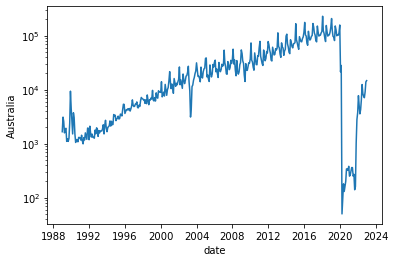

In [29]:
sns.lineplot(data = tourism_data, y = "Australia", x = "date")
plt.yscale("log")

<AxesSubplot:xlabel='date', ylabel='d12_1'>

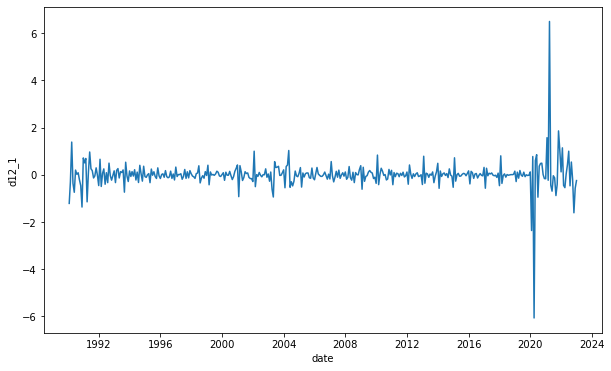

In [52]:
australia = tourism_data[["date", "Australia"]].copy()
australia.set_index("date", inplace=True)

australia["d12"] = np.log(australia / australia.shift(12))
australia["d12_1"] = australia["d12"] - australia["d12"].shift(1)

sns.lineplot(x = australia.index, y = australia.d12_1)

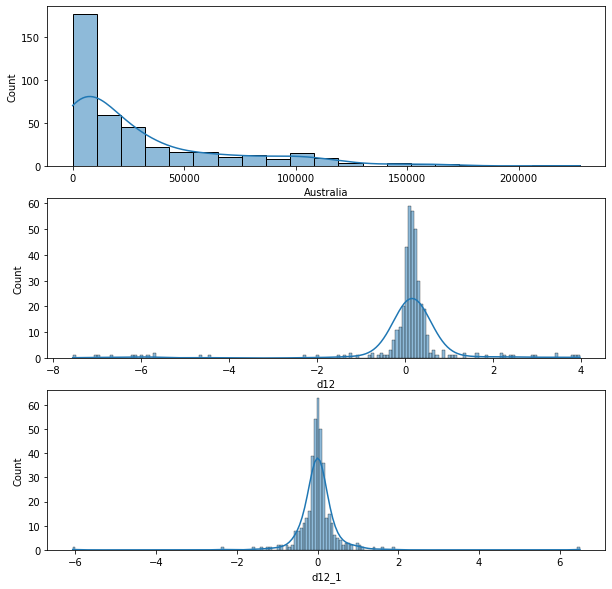

In [54]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

for i, col in enumerate(["Australia", "d12", "d12_1"]):
    sns.histplot(data = australia, x = col, ax = axs[i], kde = True)

<AxesSubplot:xlabel='Australia', ylabel='Australia'>

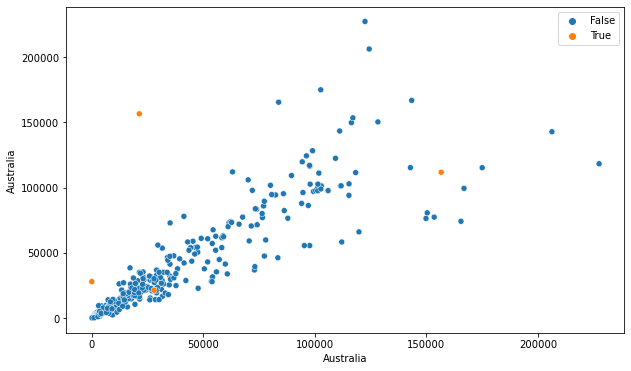

In [50]:
sns.scatterplot(x = australia.Australia, y = australia.Australia.shift(1), hue = australia.index.year == 2020)

In [44]:
australia.head(15)

,Australia,d12
date,,
1989-01-01,1660.0,NaN
1989-02-01,3090.0,NaN
1989-03-01,2570.0,NaN
1989-04-01,1580.0,NaN
1989-05-01,1850.0,NaN
1989-06-01,1920.0,NaN
1989-07-01,1100.0,NaN
1989-08-01,1220.0,NaN
1989-09-01,1100.0,NaN


In [43]:
australia.shift(12).dropna().head()

,Australia,d12
date,,
1991-01-01,4420.0,0.979322
1991-02-01,2450.0,-0.232083
1991-03-01,1510.0,-0.531796
1991-04-01,3720.0,0.856299
1991-05-01,3030.0,0.493377
